In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.shape

(891, 12)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Checking Null Values**

In [53]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Dropping Unneccessary Columns**

In [54]:
df.drop(columns="Cabin", axis=1, inplace=True)

**Filling the missing values of the 'Age' column by Mean Value of the column**

In [55]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

<ipython-input-55-f1dfd8b2652b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [56]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

<ipython-input-56-1a906c608830>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [57]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [58]:
df.duplicated().sum()

0

**Checking the survival count of people**

In [59]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


<ipython-input-60-ec74b70baec5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette='seismic',)


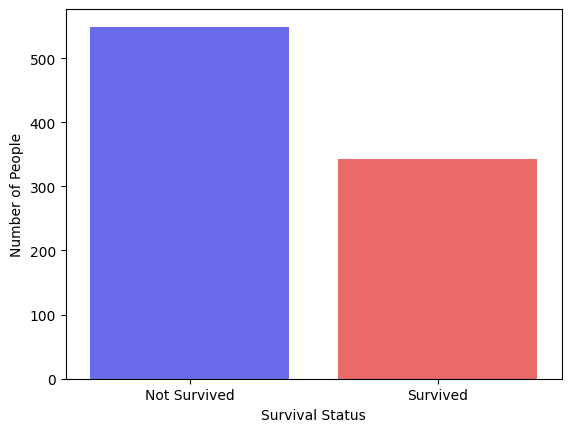

In [60]:
sns.countplot(x="Survived", data=df, palette='seismic',)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.show()

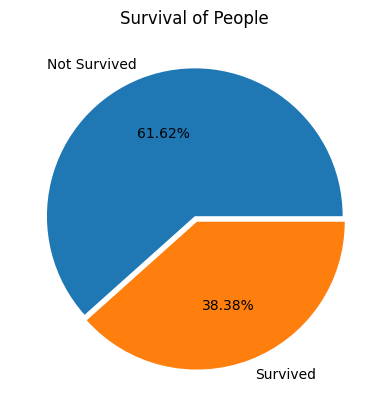

In [61]:
plt.pie(df["Survived"].value_counts(), explode=[0,0.04], autopct="%1.2f%%", labels=["Not Survived", "Survived"])
plt.title("Survival of People")
plt.show()

**People survived of different gender**

<ipython-input-62-fa6b3ba2ad09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="mako",)


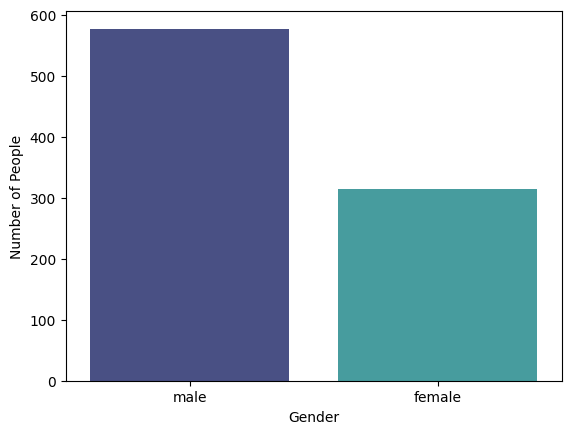

In [62]:
df["Sex"].unique()

sns.countplot(x="Sex", data=df, palette="mako",)
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.show()

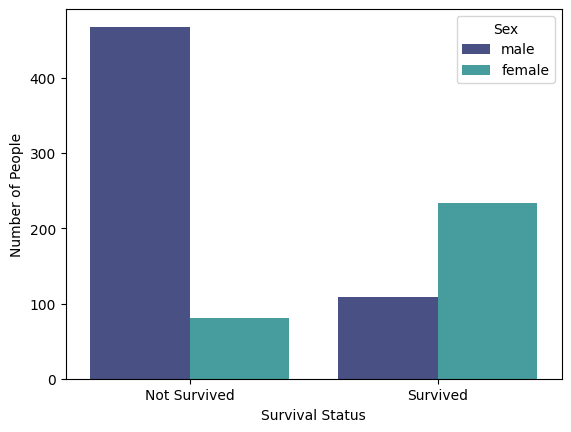

In [63]:
sns.countplot(x="Survived", hue="Sex", data=df, palette="mako",)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.show()

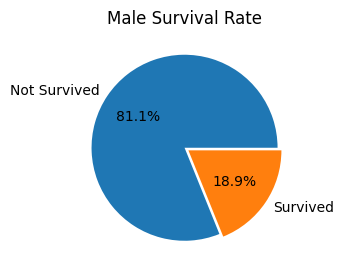

In [64]:
df[df["Sex"] == "male"].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6), explode=[0,0.05], autopct='%1.1f%%', labels=["Not Survived", "Survived"])
plt.ylabel("")
plt.title("Male Survival Rate")
plt.show()

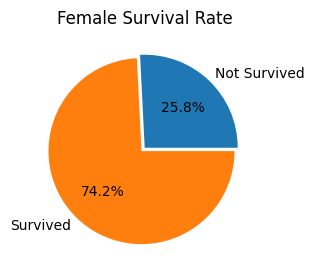

In [65]:
df[df["Sex"] == "female"].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6), explode=[0,0.05], autopct='%1.1f%%', labels=["Not Survived", "Survived"])
plt.ylabel("")
plt.title("Female Survival Rate")
plt.show()

**Survival rate of Female was much higher in comparison to Male**

<ipython-input-66-e219dc1c5ef7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette='flare',)


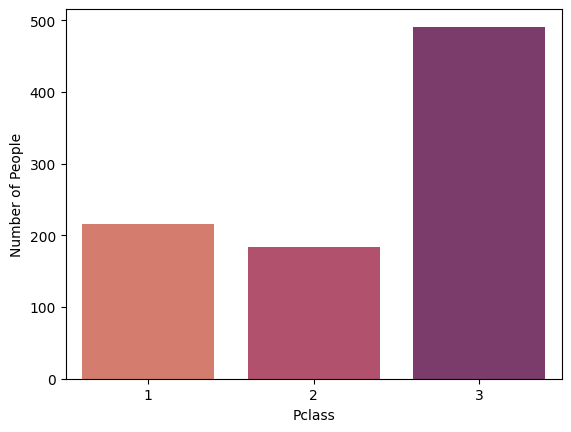

In [66]:
sns.countplot(x="Pclass", data=df, palette='flare',)
plt.xlabel("Pclass")
plt.ylabel("Number of People")
plt.show()

**People survived with different passenger class**

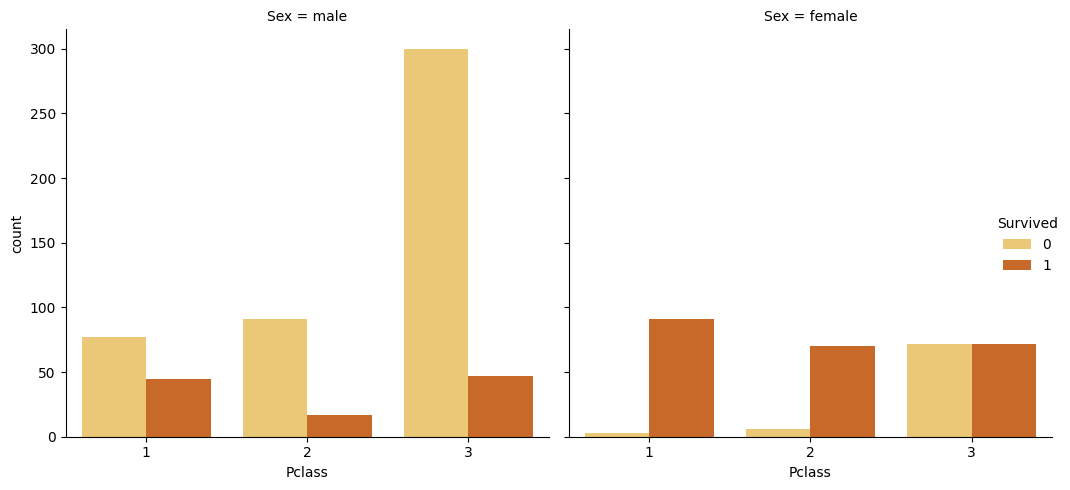

In [67]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=df, palette='YlOrBr')
plt.tight_layout()

**People survived from different Embarkment**

<ipython-input-68-d19d0d0de4b1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Embarked", data=df, palette='cubehelix',)


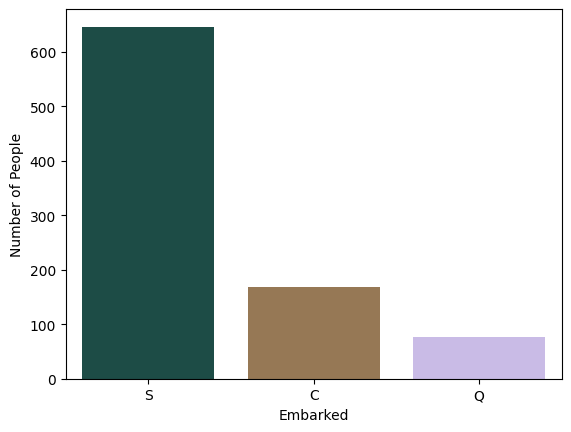

In [68]:
sns.countplot(x="Embarked", data=df, palette='cubehelix',)
plt.xlabel("Embarked")
plt.ylabel("Number of People")
plt.show()

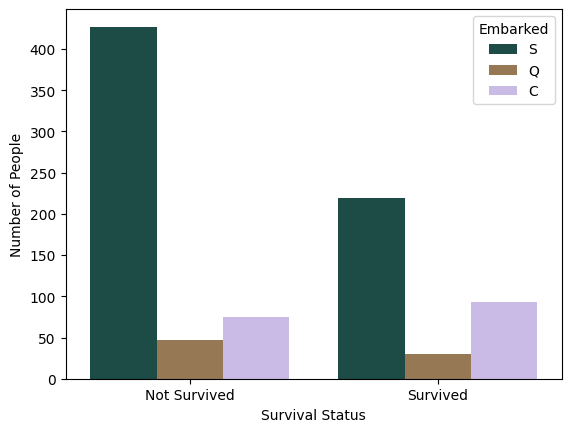

In [69]:
sns.countplot(x="Survived", hue="Embarked", data=df, palette='cubehelix',)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.show()

<ipython-input-70-d1ec04688ddb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SibSp", data=df, ax=axes[0], palette='husl')
<ipython-input-70-d1ec04688ddb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Parch", data=df, ax=axes[1], palette='husl')


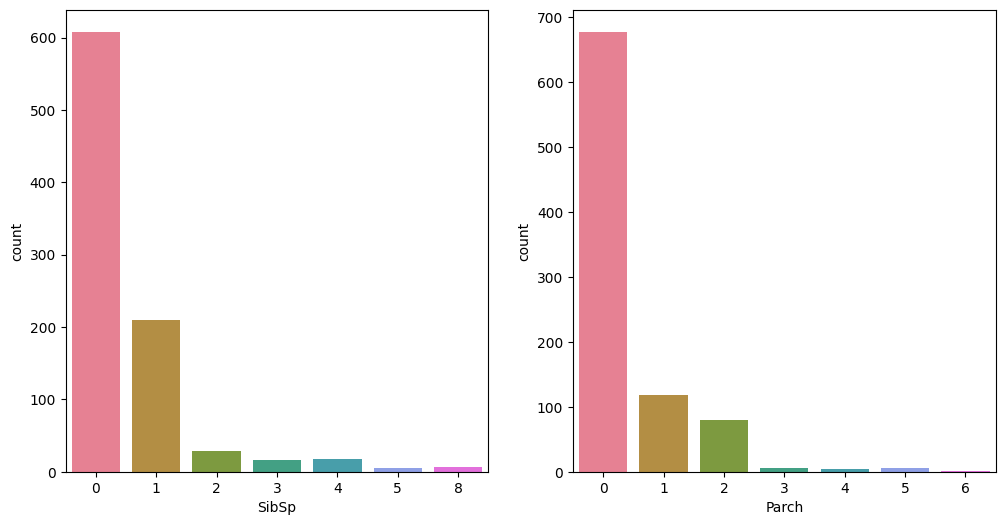

In [70]:
fig,axes=plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x="SibSp", data=df, ax=axes[0], palette='husl')
sns.countplot(x="Parch", data=df, ax=axes[1], palette='husl')
plt.show()

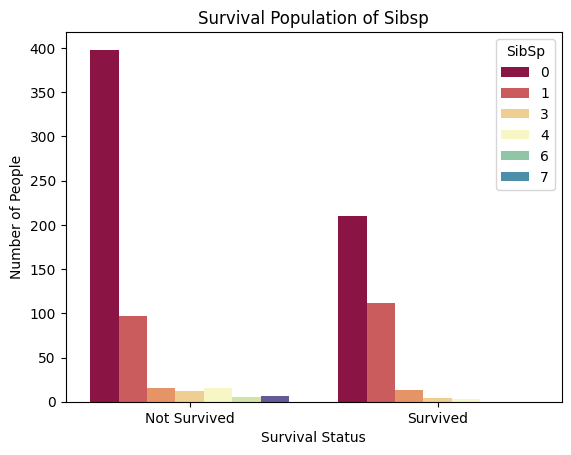

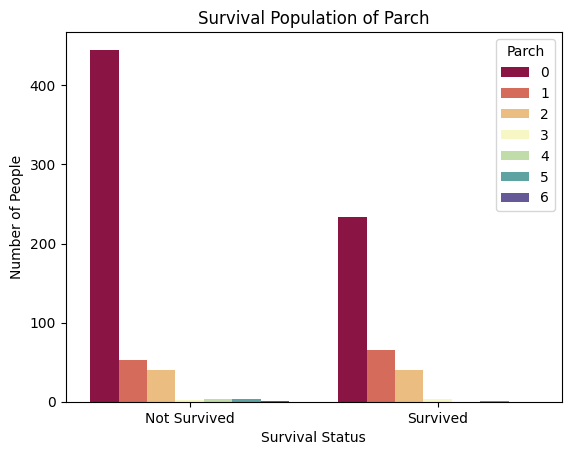

In [71]:
sns.countplot(x="Survived", hue="SibSp", data=df, palette='Spectral')
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.title("Survival Population of Sibsp")
plt.show()


sns.countplot(x="Survived", hue="Parch", data=df, palette='Spectral')
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.title("Survival Population of Parch")
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.show()


**Distribution of Fare and Age**

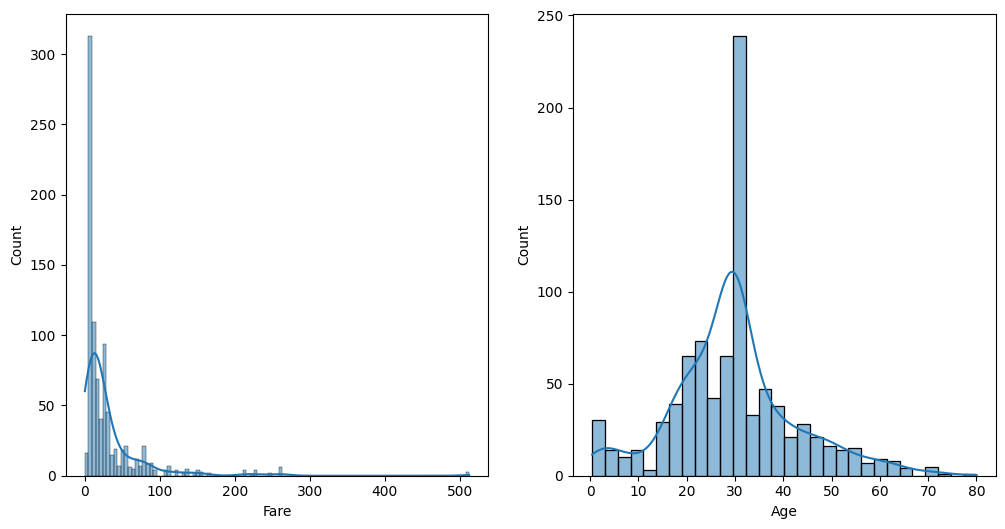

In [72]:
fig,axes=plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df["Fare"], kde=True, ax=axes[0])
sns.histplot(df["Age"].dropna(), kde=True, ax=axes[1])
plt.show()

<ipython-input-73-e42dedd04050>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot=df.pivot_table(index="Age_Categories", values="Survived")


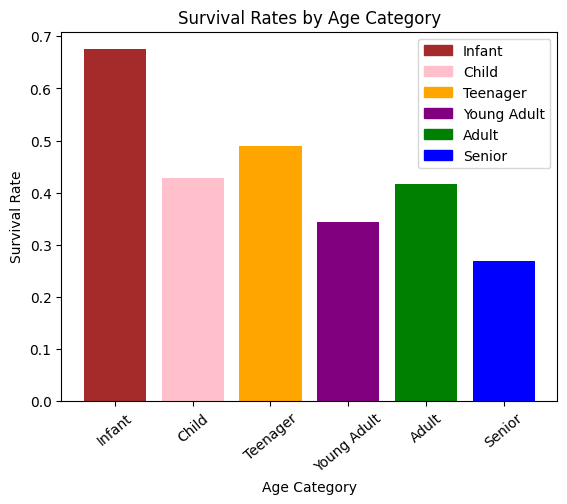

In [73]:

cut_points=[ 0, 5, 12, 18, 35, 60, 100]
label_names=["Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]


df['Age_Categories']=pd.cut(df["Age"], bins=cut_points, labels=label_names, right=False)


age_cat_pivot=df.pivot_table(index="Age_Categories", values="Survived")

colors=["brown", "pink", "orange", "purple", "green", "blue"]

fig, ax=plt.subplots()
bars=ax.bar(age_cat_pivot.index, age_cat_pivot["Survived"], color=colors)

handles=[plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title("Survival Rates by Age Category")
ax.set_xlabel("Age Category")
ax.set_ylabel("Survival Rate")
plt.xticks(rotation=40)
plt.show()

**Observing Young Adult had the least survival rate**

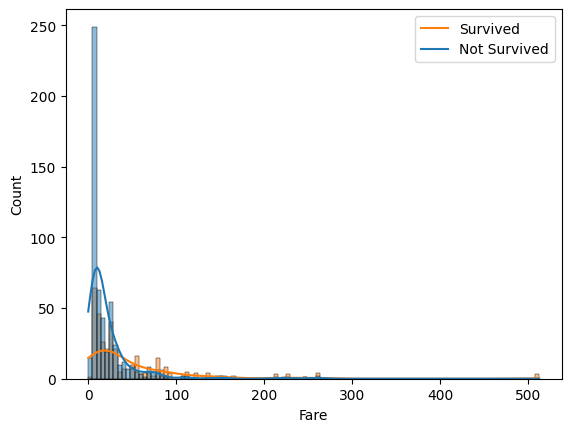

In [74]:
sns.histplot(x="Fare", hue="Survived", data=df, kde=True)
plt.legend(labels=["Survived", "Not Survived"])
plt.show()

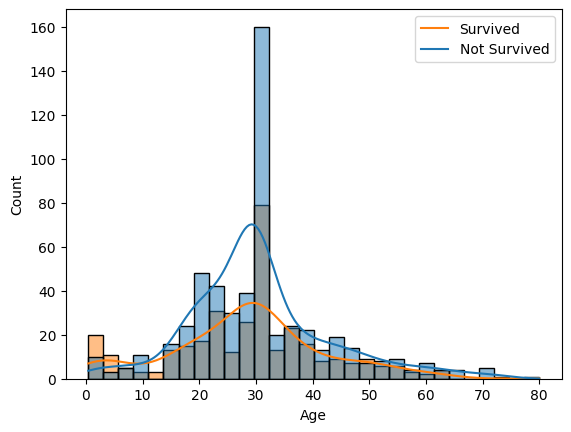

In [75]:
sns.histplot(x="Age", hue="Survived", data=df, kde=True)
plt.legend(labels=["Survived", "Not Survived"])
plt.show()

**Checking Correlation**

In [76]:
df.replace({"Sex":{"male":1, "female":0}, "Embarked":{"S":0, "C":1, "Q":2}}, inplace=True)


<ipython-input-76-93a415fab02c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Sex":{"male":1, "female":0}, "Embarked":{"S":0, "C":1, "Q":2}}, inplace=True)


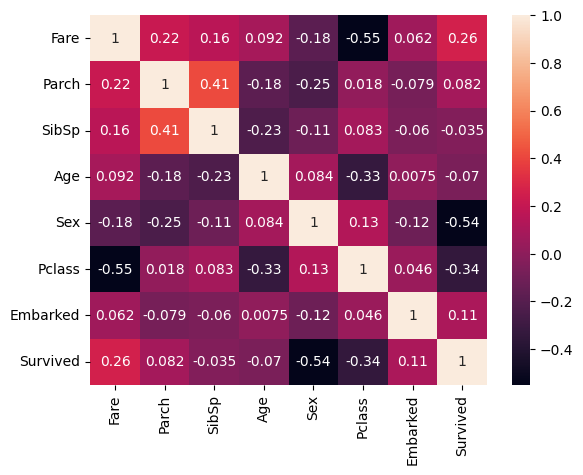

In [77]:
df_num=df[["Fare", "Parch", "SibSp", "Age", "Sex", "Pclass", "Embarked", "Survived"]]
sns.heatmap(df_num.corr(), annot=True)
plt.show()